In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from collections import Counter

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(knn, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = knn.predict(X_train)
        knn_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{knn_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = knn.predict(X_test)
        knn_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{knn_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [10]:
df = pd.read_csv('clean(blank error)mother_data_資料統整(220103-220828).csv')

features = pd.read_csv('1124 287 features.csv')
features_list = features['features'].tolist()

X = df[features_list]
# X = df.drop('diabetes', axis=1)
y = df['BS-mg/dL_4class']
# X.info()
Counter(y)

C:\Users\user\AppData\Local\Temp\ipykernel_15732\512876344.py:1: DtypeWarning: Columns (214,306) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean(blank error)mother_data_資料統整(220103-220828).csv')


Counter({0: 68, 1: 857, 2: 1951, 3: 5402})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.1, random_state = 28) # , stratify=y

print(X.shape)
print(y.shape)

(8278, 287)
(8278,)


In [12]:
df.shape

(8278, 346)

In [13]:
check_for_nan = X.isnull().any().any()
check_for_nan

False

In [14]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler() # sampling_strategy=0.5
X_over, y_over = over.fit_resample(X_train, y_train)
print(Counter(y_over))

Counter({2: 4879, 3: 4879, 1: 4879, 0: 4879})


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# sfs1 = SFS(knn, 
#            k_features=25, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=0,
#            n_jobs=10)

# sfs1 = sfs1.fit(X_over, y_over)

### 看找完的子集

In [17]:
# type(sfs1.subsets_)
# sfs1_df = pd.DataFrame.from_dict(sfs1.subsets_)
# sfs1_df.to_csv('1122 sfs1_knn_df_25 features_diabetes 3 type.csv', index = None)

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=150, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=10)
sfs = sfs.fit(X_over, y_over)

print('\nSequential Forward Selection (k=9):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################
type(sfs.subsets_)
sfs_df = pd.DataFrame.from_dict(sfs.subsets_)
sfs_df.to_csv('1124 sfs_knn_df_150 features_diabetes 3 type.csv', index = None)




Sequential Forward Selection (k=9):
(2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 38, 39, 46, 57, 58, 60, 61, 74, 75, 76, 77, 78, 79, 84, 88, 90, 92, 93, 94, 95, 97, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 150, 151, 153, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 203, 204, 207, 211, 215, 217, 218, 219, 220, 222, 223, 225, 226, 228, 229, 230, 231, 232, 235, 236, 237, 240, 241, 242, 244, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 268, 269, 272, 273, 276, 277, 282, 284, 285, 286)
CV Score:
0.7363189178110268


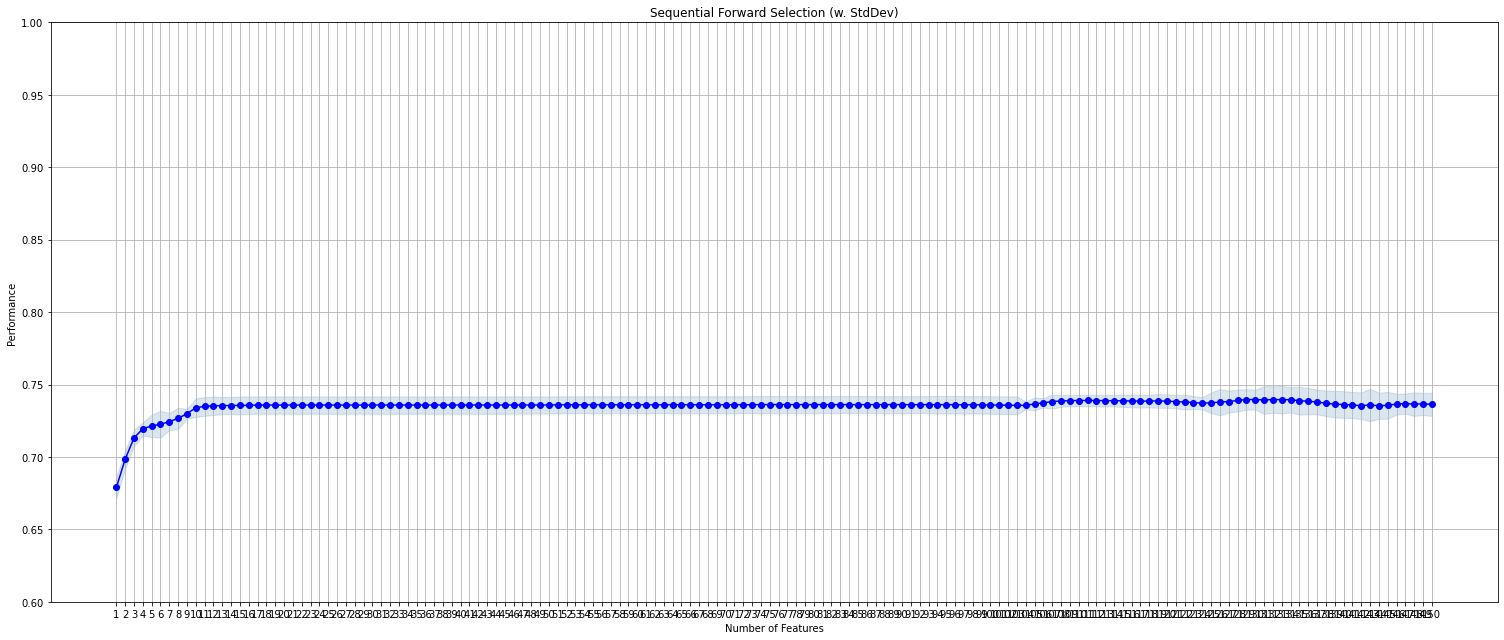

In [34]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
# plot ecg_rate image
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams["figure.autolayout"] = True
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [20]:
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=150, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=10)
sbs = sbs.fit(X_over, y_over)

print('\nSequential Backward Selection (k=9):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################
type(sbs.subsets_)
sbs_df = pd.DataFrame.from_dict(sbs.subsets_)
sbs_df.to_csv('1124 sbs_knn_df_150 features_diabetes 3 type.csv', index = None)




Sequential Backward Selection (k=9):
(1, 2, 5, 6, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 180, 181, 187, 198, 199, 200, 201, 202, 205, 208, 209, 210, 212, 213, 214, 216, 221, 222, 224, 227, 232, 243, 256, 264, 265, 266, 267, 270, 274, 275, 278, 279, 280, 281, 282, 283)
CV Score:
0.6922012707522034


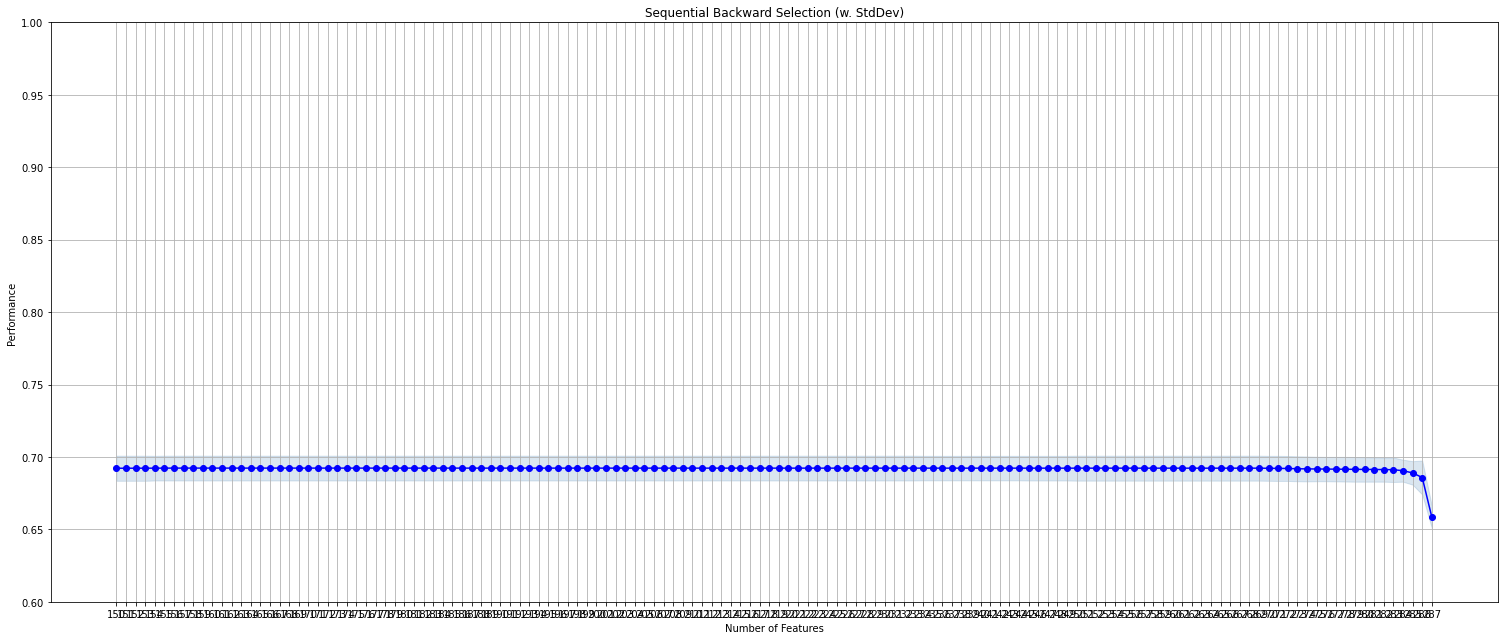

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
# plot ecg_rate image
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams["figure.autolayout"] = True

fig2 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [22]:
# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features=150, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=10)
sffs = sffs.fit(X_over, y_over)

print('\nSequential Forward Floating Selection (k=9):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################
type(sffs.subsets_)
sffs_df = pd.DataFrame.from_dict(sffs.subsets_)
sffs_df.to_csv('1124 sffs_knn_df_150 features_diabetes 3 type.csv', index = None)





Sequential Forward Floating Selection (k=9):
(2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 23, 38, 39, 44, 56, 57, 58, 60, 61, 74, 76, 77, 78, 79, 82, 84, 88, 89, 92, 93, 94, 97, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 144, 151, 153, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 203, 204, 207, 211, 215, 217, 218, 219, 220, 223, 225, 226, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 241, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 268, 269, 272, 273, 276, 277, 284, 285, 286)
CV Score:
0.7373437179749949


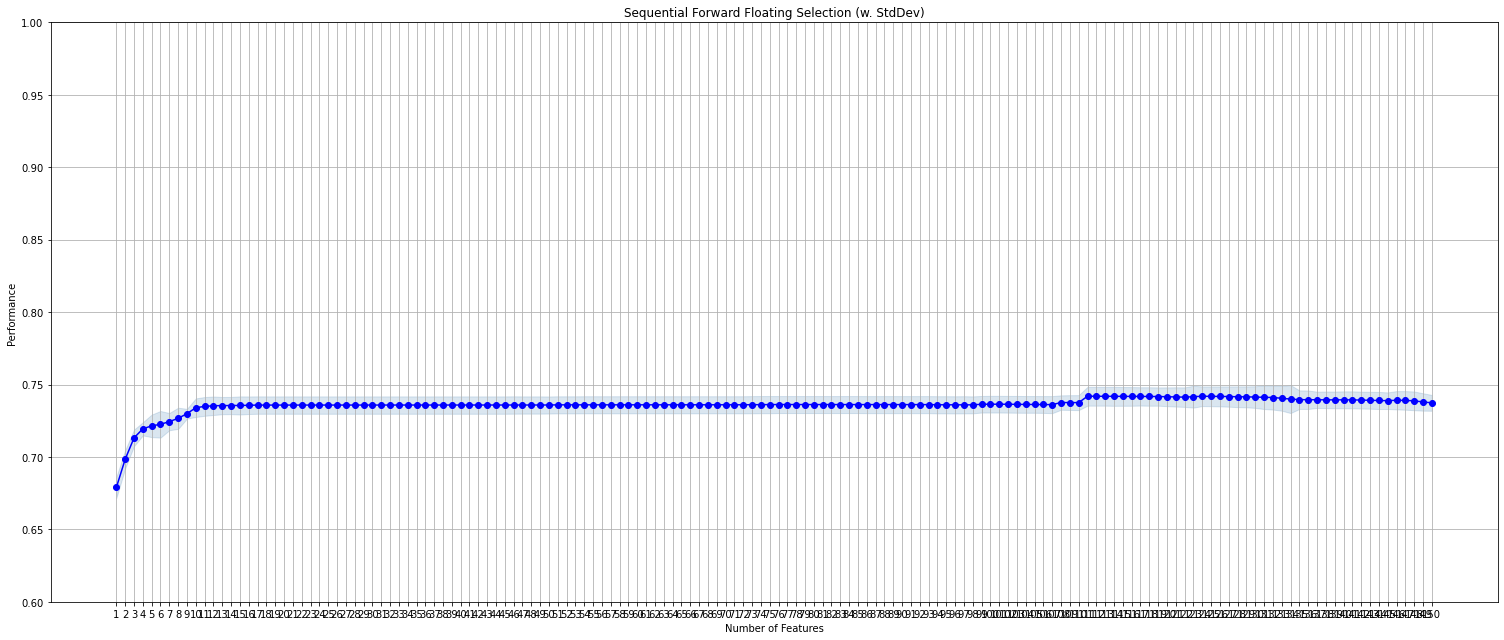

In [37]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
# plot ecg_rate image
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams["figure.autolayout"] = True
fig3 = plot_sfs(sffs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Forward Floating Selection (w. StdDev)')
plt.grid()
plt.show()

In [24]:
# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=150, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X_over, y_over)

print('\nSequential Backward Floating Selection (k=9):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)

###################################################
type(sbfs.subsets_)
sbfs_df = pd.DataFrame.from_dict(sbfs.subsets_)
sbfs_df.to_csv('1124 sbfs_knn_df_150 features_diabetes 3 type.csv', index = None)



Sequential Backward Floating Selection (k=9):
(1, 5, 6, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 118, 126, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 180, 181, 187, 198, 199, 200, 201, 202, 205, 208, 209, 210, 212, 213, 214, 216, 222, 224, 227, 239, 243, 256, 264, 265, 266, 267, 270, 274, 275, 278, 279, 280, 281, 282, 283)
CV Score:
0.6923037507686001


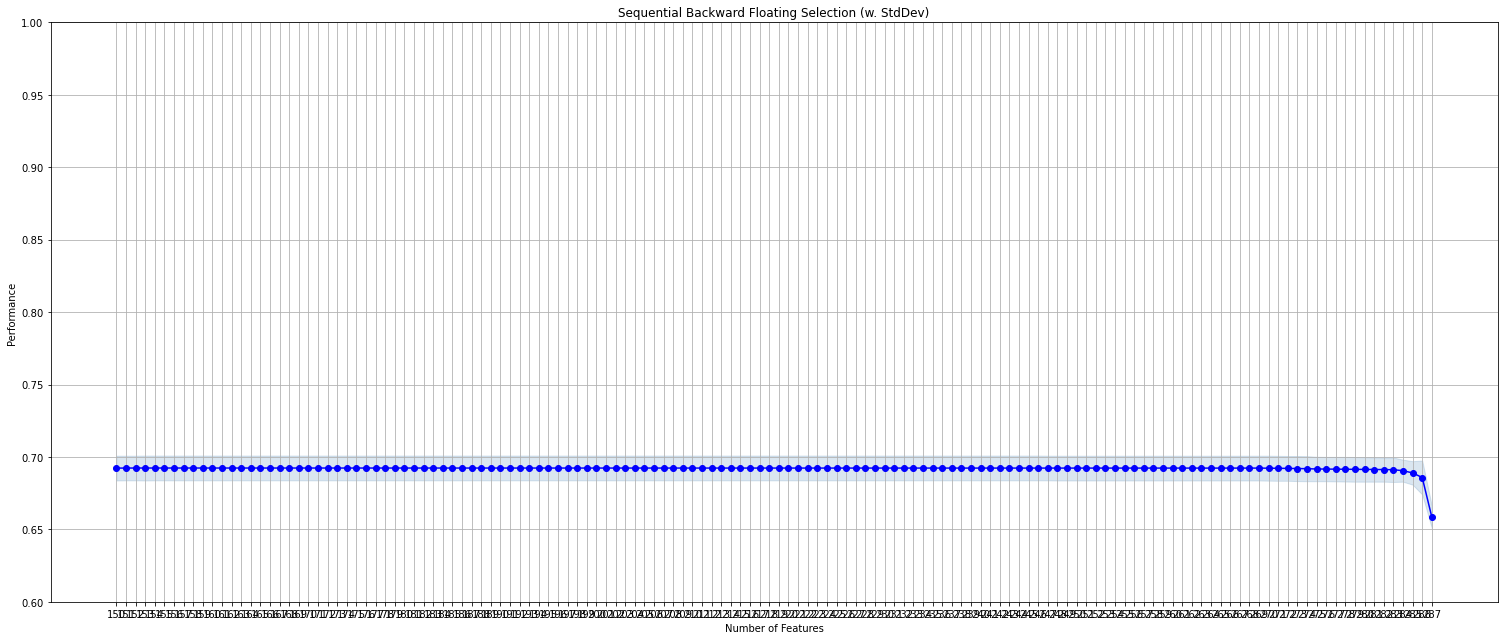

In [38]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
# plot ecg_rate image
plt.rcParams["figure.figsize"] = [21,9]
plt.rcParams["figure.autolayout"] = True
fig4 = plot_sfs(sbfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.6, 1])
plt.title('Sequential Backward Floating Selection (w. StdDev)')
plt.grid()
plt.show()